<a href="https://colab.research.google.com/github/Tar-ive/Alzheimer-s-AI4All-/blob/main/darwin-elena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# methods use


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


# csv format

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("data.csv")


In [ ]:
df.head()

ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0  id_1       5160     0.000013    120.804174       86.853334   
1  id_2      51980     0.000016    115.318238       83.448681   
2  id_3       2600     0.000010    229.933997      172.761858   
3  id_4       2130     0.000010    369.403342      183.193104   
4  id_5       2310     0.000007    257.997131      111.275889   

   max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0               957              6601          0.361800            0.217459   
1              1694              6998          0.272513            0.144880   
2              2333              5802          0.387020            0.181342   
3              1756              8159          0.556879            0.164502   
4               987              4732          0.266077            0.145104   

   mean_gmrt1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
0  103.828754  ...            0.141434              0.024471   
1   99.383459  ...            0.049663              0.018368   
2  201.347928  ...            0.178194              0.017174   
3  276.298223  ...            0.113905              0.019860   
4  184.636510  ...            0.121782              0.020872   

   mean_speed_in_air25  mean_speed_on_paper25  num_of_pendown25  paper_time25  \
0             5.596487               3.184589                71         40120   
1             1.665973               0.950249               129        126700   
2             4.000781               2.392521                74         45480   
3             4.206746               1.613522               123         67945   
4             3.319036               1.680629                92         37285   

   pressure_mean25  pressure_var25  total_time25  class  
0      1749.278166     296102.7676        144605      P  
1      1504.768272     278744.2850        298640      P  
2      1431.443492     144411.7055         79025      P  
3      1465.843329     230184.7154        181220      P  
4      1841.702561     158290.0255         72575      P  

[5 rows x 452 columns]

In [ ]:
df.describe()

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
count     174.000000   174.000000    174.000000      174.000000   
mean     5664.166667     0.000010    297.666685      200.504413   
std     12653.772746     0.000003    183.943181      111.629546   
min        65.000000     0.000002     28.734515       29.935835   
25%      1697.500000     0.000008    174.153023      136.524742   
50%      2890.000000     0.000009    255.791452      176.494494   
75%      4931.250000     0.000011    358.917885      234.052560   
max    109965.000000     0.000028   1168.328276      865.210522   

       max_x_extension1  max_y_extension1  mean_acc_in_air1  \
count        174.000000        174.000000        174.000000   
mean        1977.965517       7323.896552          0.416374   
std         1648.306365       2188.290512          0.381837   
min          754.000000        561.000000          0.067748   
25%         1362.500000       6124.000000          0.218209   
50%         1681.000000       6975.500000          0.275184   
75%         2082.750000       8298.500000          0.442706   
max        18602.000000      15783.000000          2.772566   

       mean_acc_on_paper1  mean_gmrt1  mean_jerk_in_air1  ...  mean_gmrt25  \
count          174.000000  174.000000         174.000000  ...   174.000000   
mean             0.179823  249.085549           0.067556  ...   221.360646   
std              0.064693  132.698462           0.074776  ...    63.762013   
min              0.096631   41.199445           0.011861  ...    69.928033   
25%              0.146647  161.136182           0.029523  ...   178.798382   
50%              0.163659  224.445268           0.039233  ...   217.431621   
75%              0.188879  294.392298           0.071057  ...   264.310776   
max              0.627350  836.784702           0.543199  ...   437.373267   

       mean_jerk_in_air25  mean_jerk_on_paper25  mean_speed_in_air25  \
count          174.000000            174.000000           174.000000   
mean             0.148286              0.019934             4.472643   
std              0.062207              0.002388             1.501411   
min              0.030169              0.014987             1.323565   
25%              0.107732              0.018301             3.485934   
50%              0.140483              0.019488             4.510578   
75%              0.199168              0.021134             5.212794   
max              0.375078              0.029227            10.416715   

       mean_speed_on_paper25  num_of_pendown25   paper_time25  \
count             174.000000        174.000000     174.000000   
mean                2.871613         85.839080   43109.712644   
std                 0.852809         27.485518   19092.024337   
min                 0.950249         32.000000   15930.000000   
25%                 2.401199         66.000000   32803.750000   
50%                 2.830672         81.000000   37312.500000   
75%                 3.335828        101.500000   46533.750000   
max                 5.602909        209.000000  139575.000000   

       pressure_mean25  pressure_var25  total_time25  
count       174.000000      174.000000  1.740000e+02  
mean       1629.585962   163061.767360  1.642033e+05  
std         324.142316    56845.610814  4.969397e+05  
min         474.049462    26984.926660  2.998000e+04  
25%        1499.112088   120099.046800  5.917500e+04  
50%        1729.385010   158236.771800  7.611500e+04  
75%        1865.626974   200921.078475  1.275425e+05  
max        1999.775983   352981.850000  5.704200e+06  

[8 rows x 450 columns]

In [ ]:
df.isnull().sum()

ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64

In [ ]:
# Feature scaling: Normalize numerical columns using StandardScaler
scaler = StandardScaler()

# Scale the selected features
scaled_features = scaler.fit_transform(df.iloc[:, 1:451])

# Replace the original features with the scaled ones
df.iloc[:, 1:451] = scaled_features


In [ ]:
# Feature engineering: Create new feature as the ratio of gmrt_in_air1 to gmrt_on_paper1
df['gmrt_ratio'] = df['gmrt_in_air1'] / df['gmrt_on_paper1']

# Create another feature: the average of acceleration in air and on paper
df['mean_acc_total'] = (df['mean_acc_in_air1'] + df['mean_acc_on_paper1']) / 2


/var/folders/v7/p7bqqm9j3w598xyfvyjmc6200000gn/T/ipykernel_77648/2982706953.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['gmrt_ratio'] = df['gmrt_in_air1'] / df['gmrt_on_paper1']
/var/folders/v7/p7bqqm9j3w598xyfvyjmc6200000gn/T/ipykernel_77648/2982706953.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mean_acc_total'] = (df['mean_acc_in_air1'] + df['mean_acc_on_paper1']) / 2


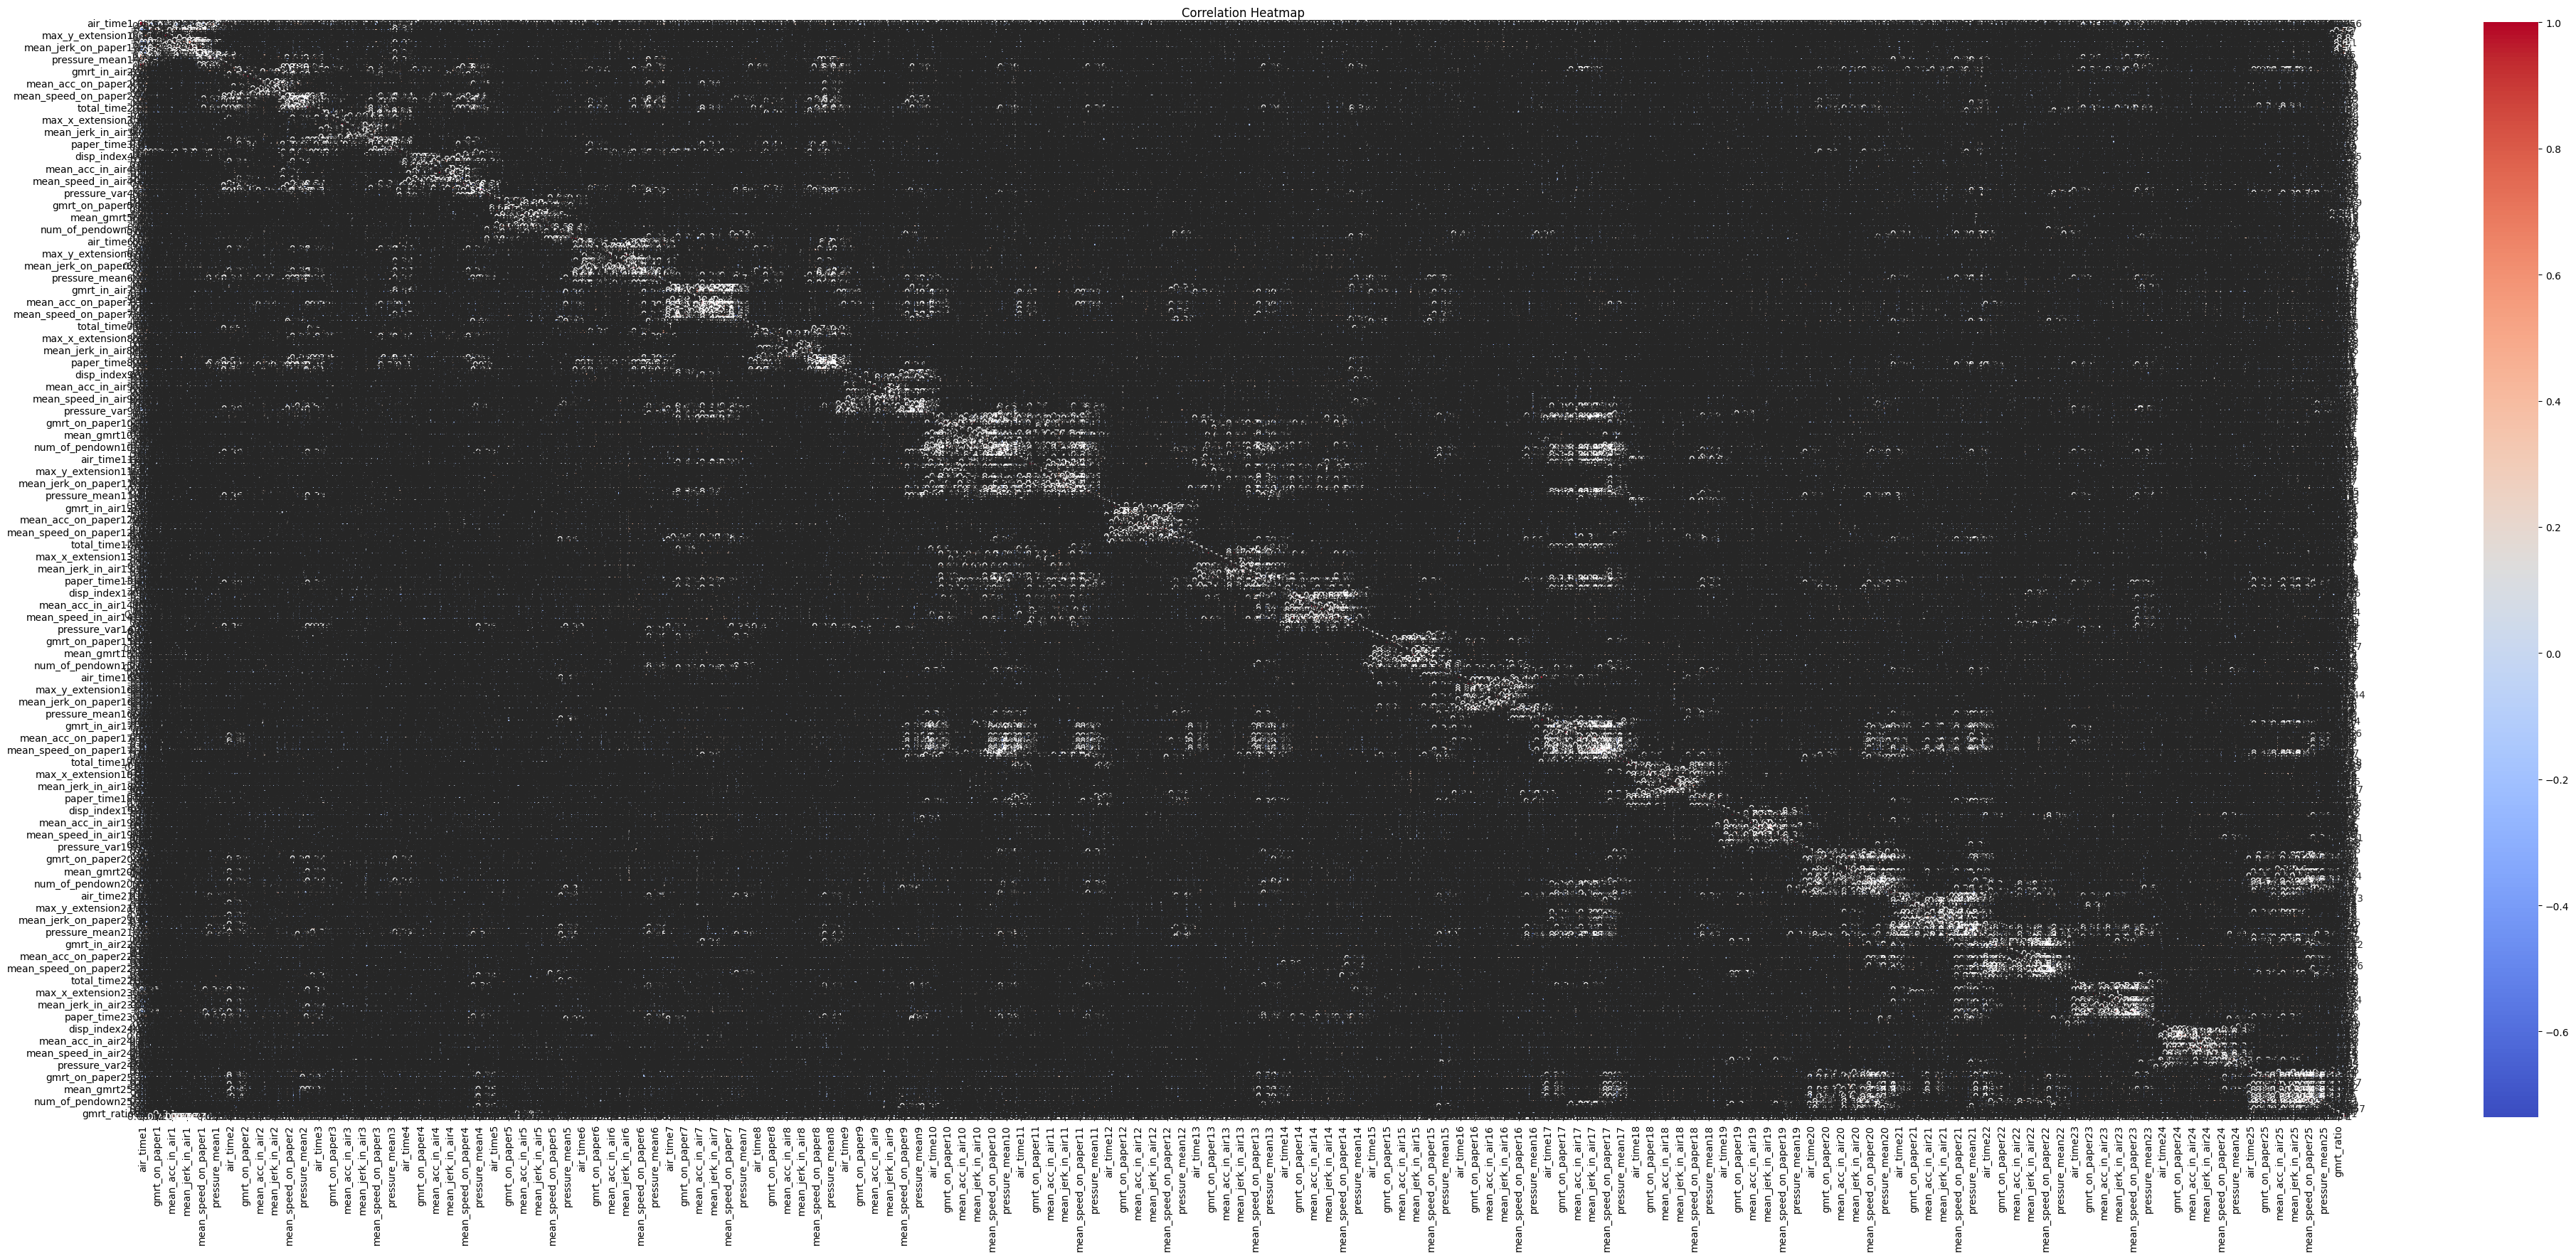

In [ ]:

# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Data visualization: Plot a correlation heatmap using seaborn to visualize relationships between variables
plt.figure(figsize=(50,20))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


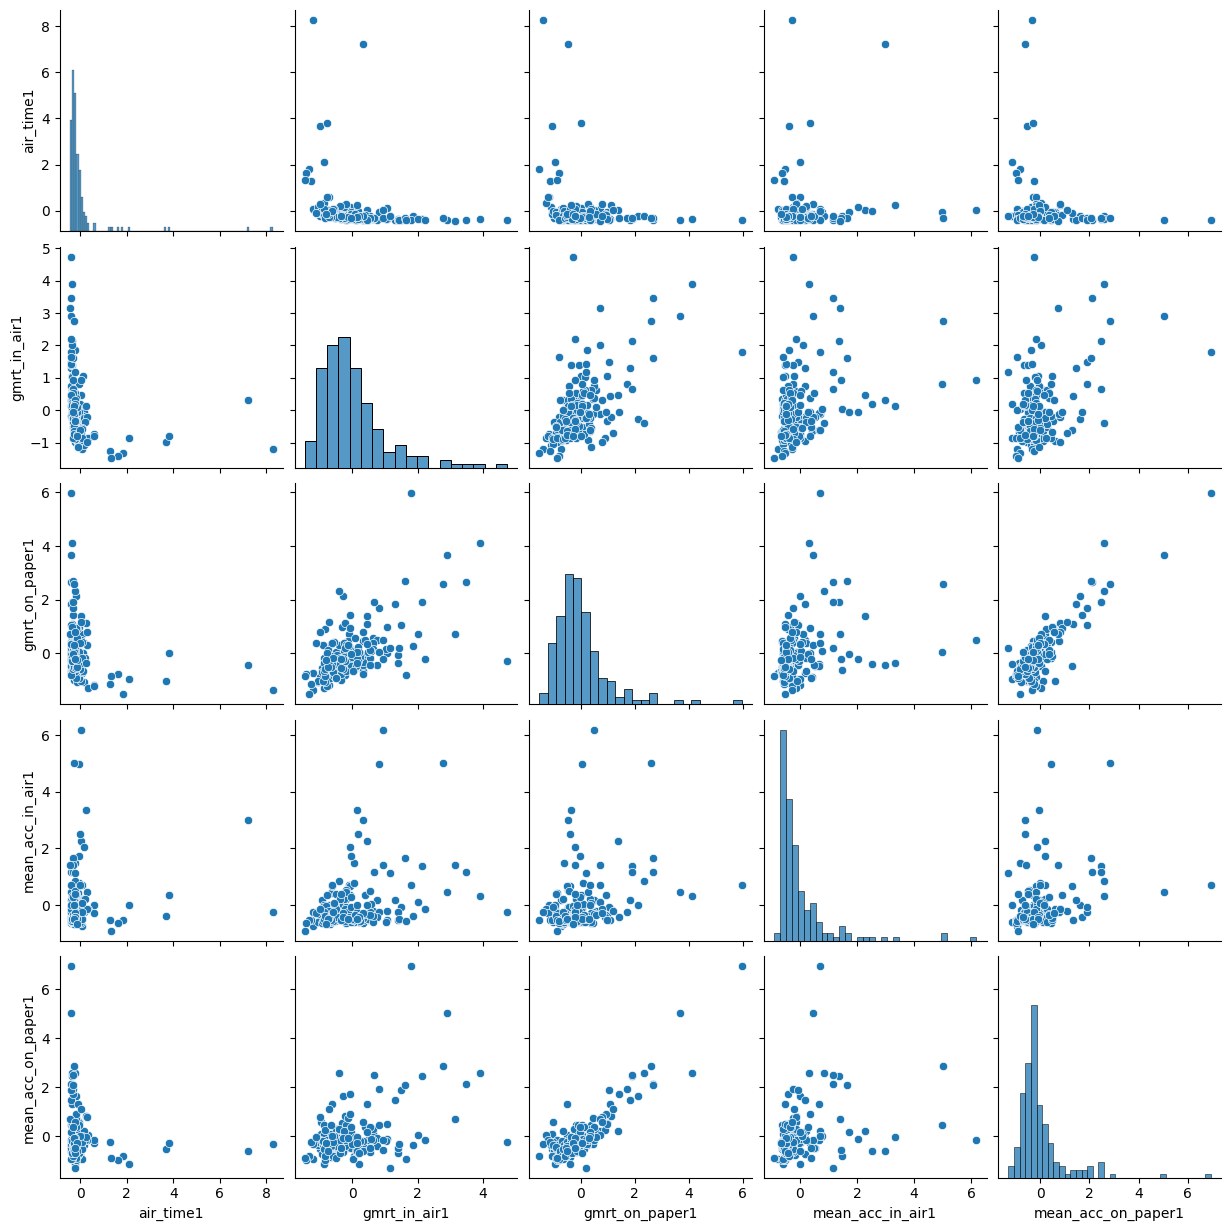

In [ ]:
# Pairplot: Visualize pairwise relationships between selected features
sns.pairplot(df[['air_time1', 'gmrt_in_air1', 'gmrt_on_paper1', 'mean_acc_in_air1', 'mean_acc_on_paper1']])
plt.show()

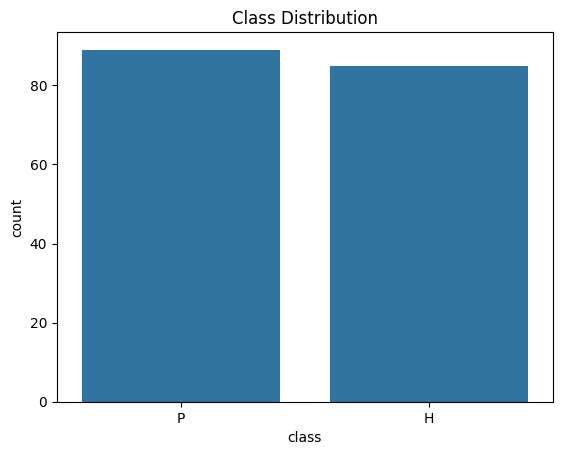

In [ ]:
# Visualize class distribution using a count plot
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
# Boxplot: Show the relationship between class and gmrt_in_air1
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='gmrt_in_air1', data=df)
plt.title('GMRT in Air vs Class')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:

# Assuming 'class' is the target variable and 'ID' is not needed for modeling
X = df.drop(columns=['class', 'ID'])  # Features
y = df['class']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Train a RandomForestClassifier to identify important features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

num_of_pendown19      0.031308
total_time23          0.025379
air_time15            0.021985
total_time17          0.021027
paper_time17          0.019139
                        ...   
total_time14          0.000000
gmrt_in_air15         0.000000
mean_jerk_in_air15    0.000000
num_of_pendown15      0.000000
mean_acc_total        0.000000
Length: 452, dtype: float64


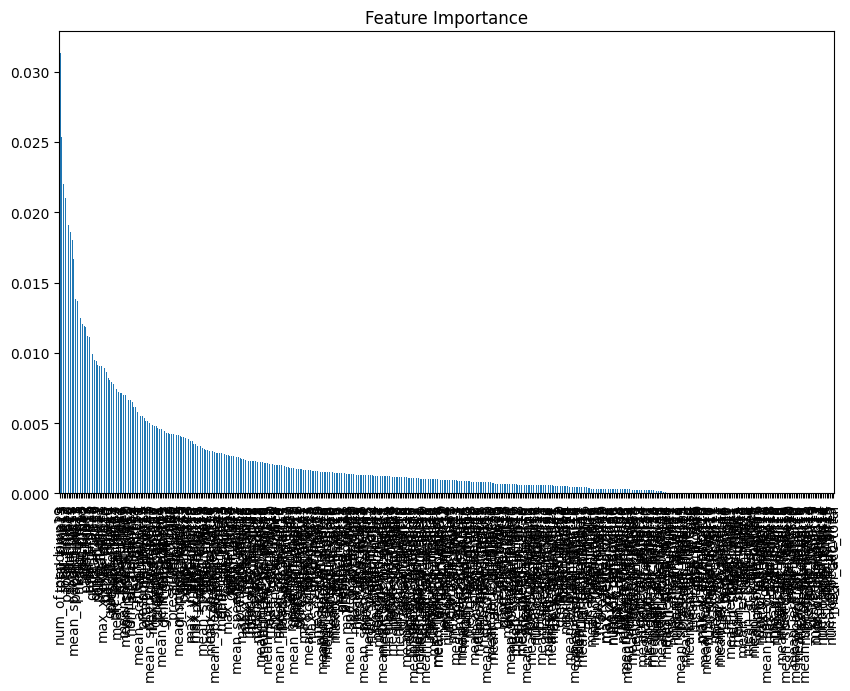

In [ ]:
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['P', 'H', 'H', 'H', 'H', 'H', 'H', 'P', 'H', 'P', 'H', 'P', 'H',
       'P', 'P', 'P', 'H', 'P', 'P', 'H', 'H', 'H', 'H', 'P', 'P', 'H',
       'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'H', 'H', 'H', 'P', 'P',
       'H', 'H', 'P', 'P', 'P', 'H', 'H', 'H', 'P', 'H', 'P', 'H', 'P',
       'H'], dtype=object)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.89      0.86      0.87        28
           P       0.85      0.88      0.86        25

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

# parquet format

In [ ]:
df.to_parquet('data.parquet', engine='pyarrow', index=False)


In [ ]:
df_parquet = pd.read_parquet('data.parquet', engine='pyarrow')
print(df_parquet.head())




     ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0  id_1  -0.039958     0.819201     -0.964281       -1.021048   
1  id_2   3.670803     1.863195     -0.994191       -1.051635   
2  id_3  -0.242853     0.162976     -0.369289       -0.249241   
3  id_4  -0.280104     0.162976      0.391119       -0.155526   
4  id_5  -0.265837    -0.863121     -0.216284       -0.801634   

   max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0         -0.621190         -0.331301         -0.143336            0.583446   
1         -0.172774         -0.149357         -0.377846           -0.541698   
2          0.216015         -0.697480         -0.077097            0.023550   
3         -0.135051          0.382725          0.369034           -0.237507   
4         -0.602937         -1.187857         -0.394751           -0.538220   

   mean_gmrt1  ...  mean_speed_in_air25  mean_speed_on_paper25  \
0   -1.097797  ...             0.750685               0.368053   
1 

In [ ]:

print(df_parquet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 454 entries, ID to mean_acc_total
dtypes: float64(452), object(2)
memory usage: 617.3+ KB
None


In [ ]:

# Get a summary of the data
print(df_parquet.describe())

# Check for missing values
print(df_parquet.isnull().sum())


          air_time1   disp_index1  gmrt_in_air1  gmrt_on_paper1  \
count  1.740000e+02  1.740000e+02  1.740000e+02    1.740000e+02   
mean  -5.104474e-17  2.450147e-16  1.429253e-16   -2.858505e-16   
std    1.002886e+00  1.002886e+00  1.002886e+00    1.002886e+00   
min   -4.437669e-01 -2.408231e+00 -1.466259e+00   -1.532398e+00   
25%   -3.143817e-01 -6.058507e-01 -6.734151e-01   -5.747969e-01   
50%   -2.198690e-01 -9.951369e-02 -2.283101e-01   -2.157064e-01   
75%   -5.808796e-02  4.910885e-01  3.339508e-01    3.013984e-01   
max    8.266455e+00  5.532087e+00  4.746979e+00    5.971756e+00   

       max_x_extension1  max_y_extension1  mean_acc_in_air1  \
count      1.740000e+02      1.740000e+02      1.740000e+02   
mean      -5.104474e-18      1.174029e-16     -2.041789e-17   
std        1.002886e+00      1.002886e+00      1.002886e+00   
min       -7.447025e-01     -3.099412e+00     -9.156549e-01   
25%       -3.744703e-01     -5.499085e-01     -5.204735e-01   
50%       -1.80684

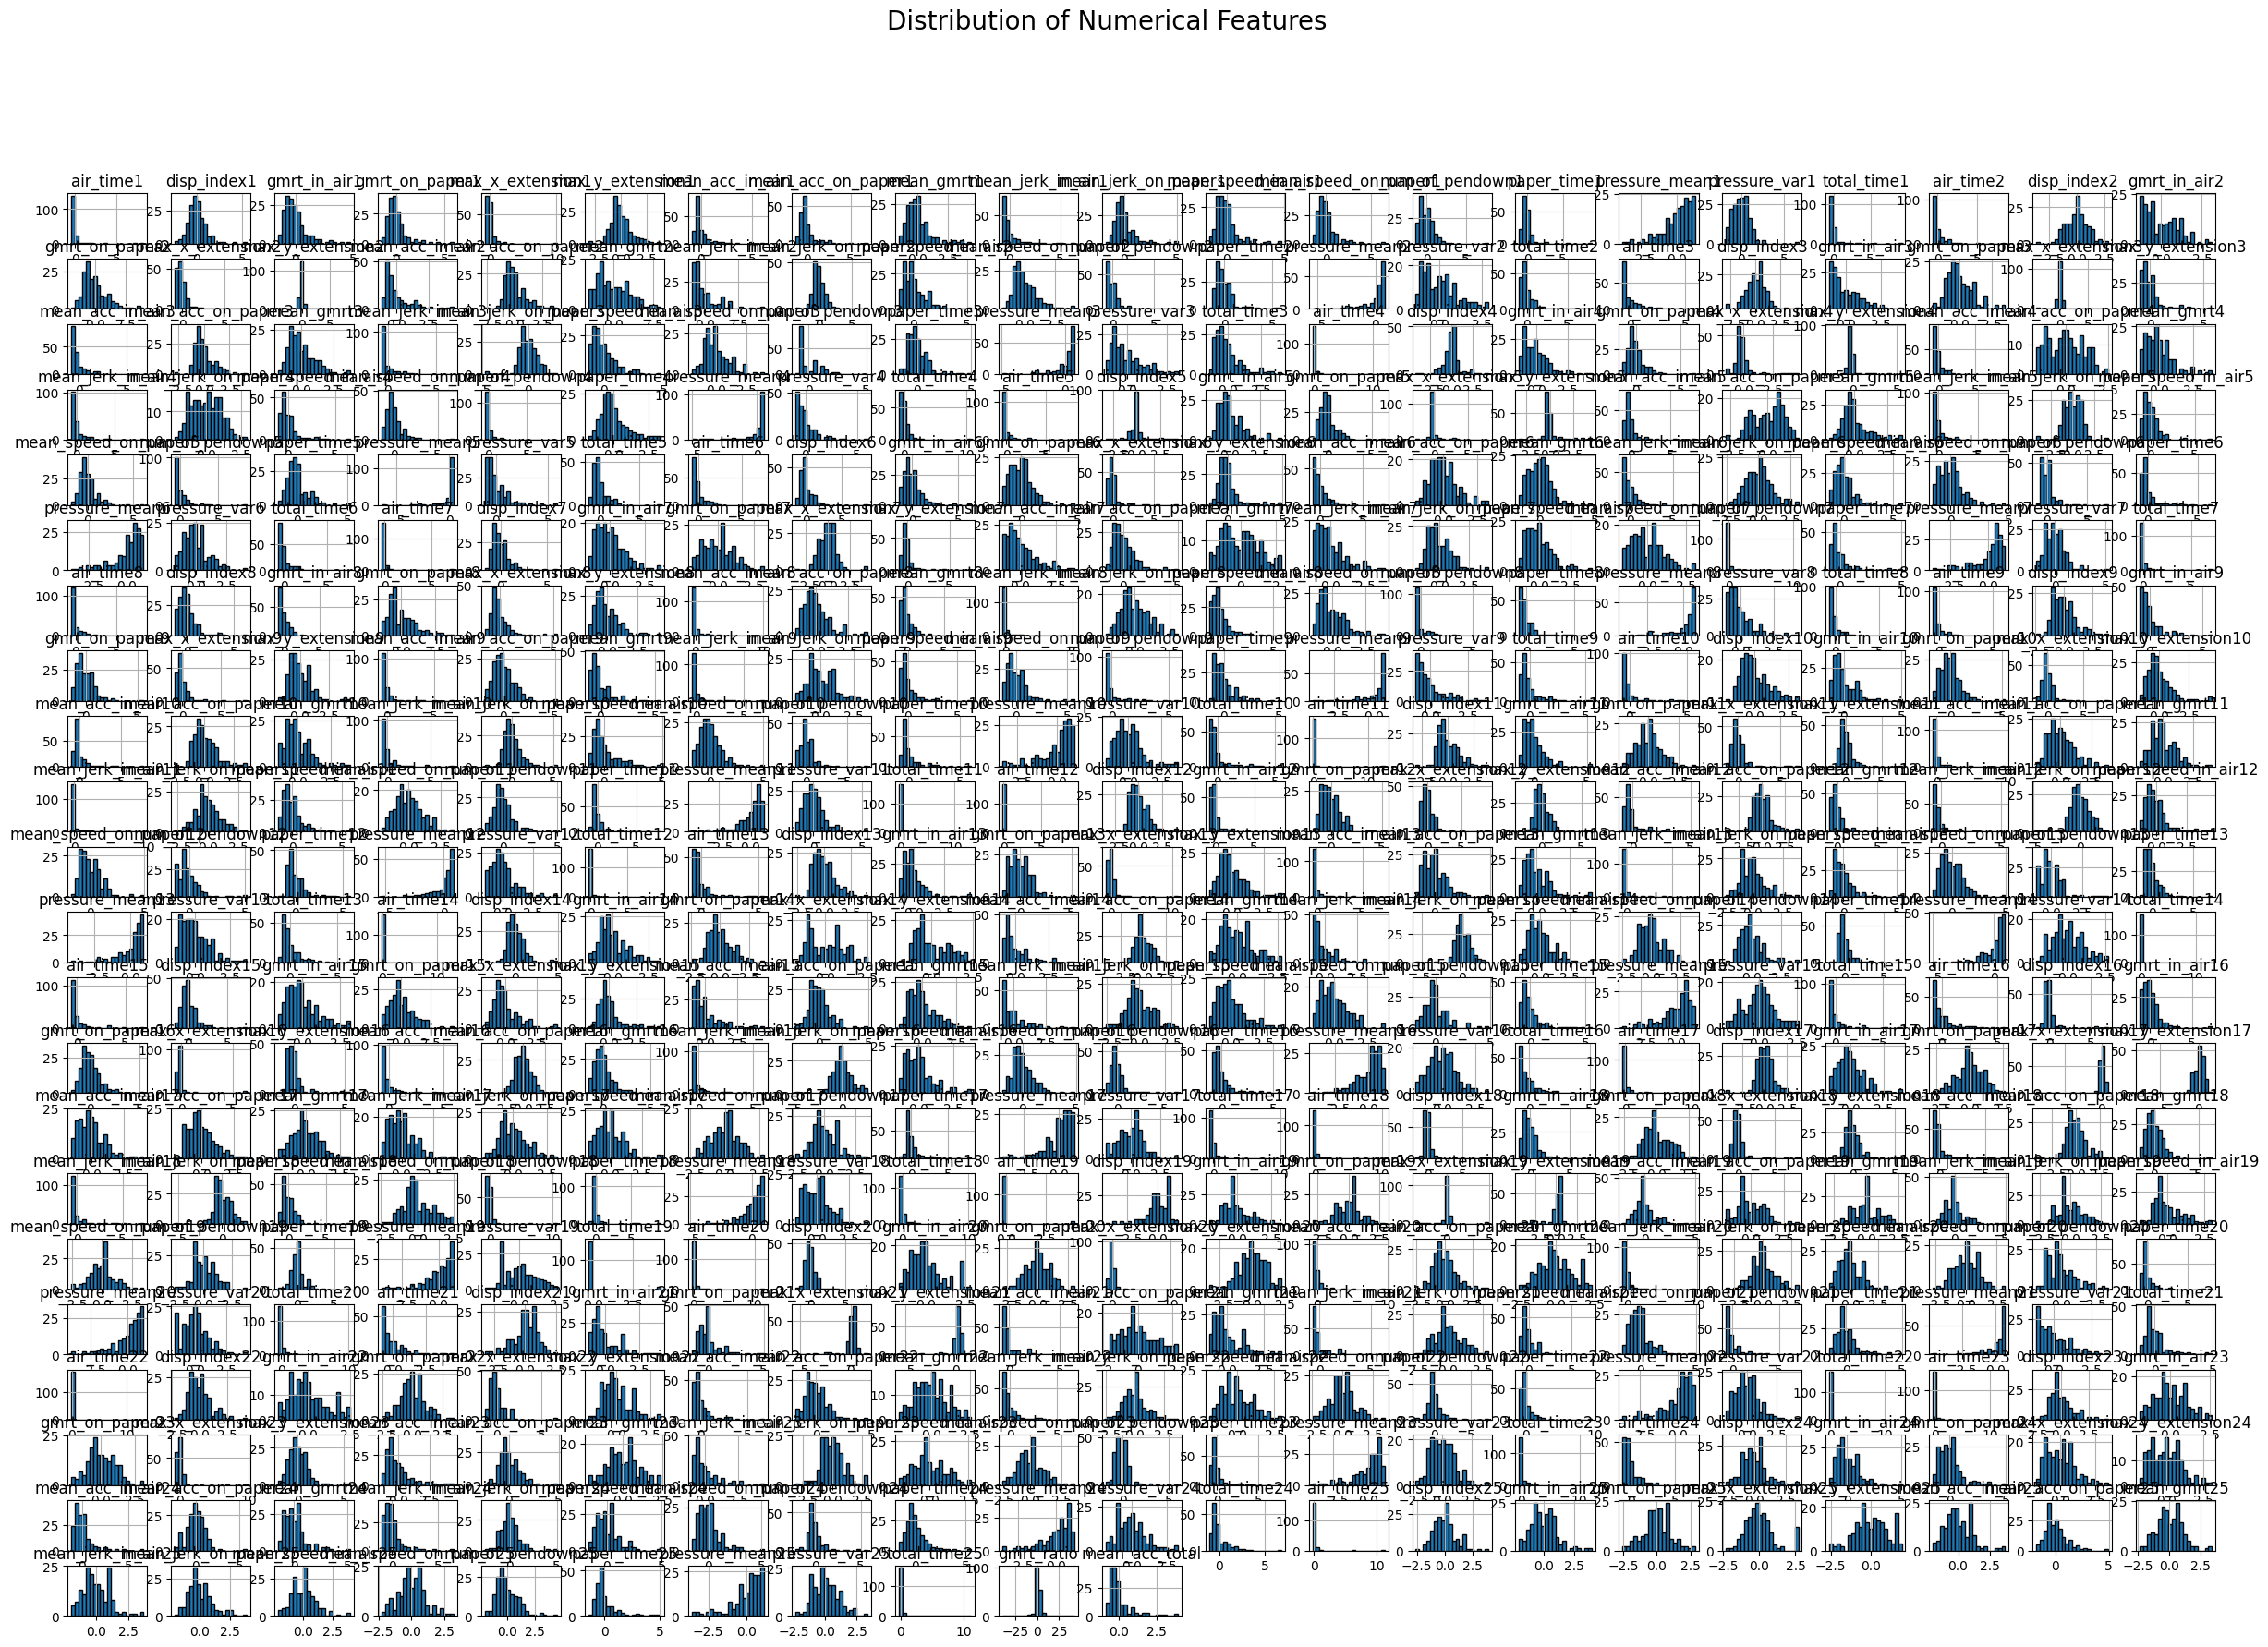

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df_parquet.hist(figsize=(30,20), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=20)
plt.show()


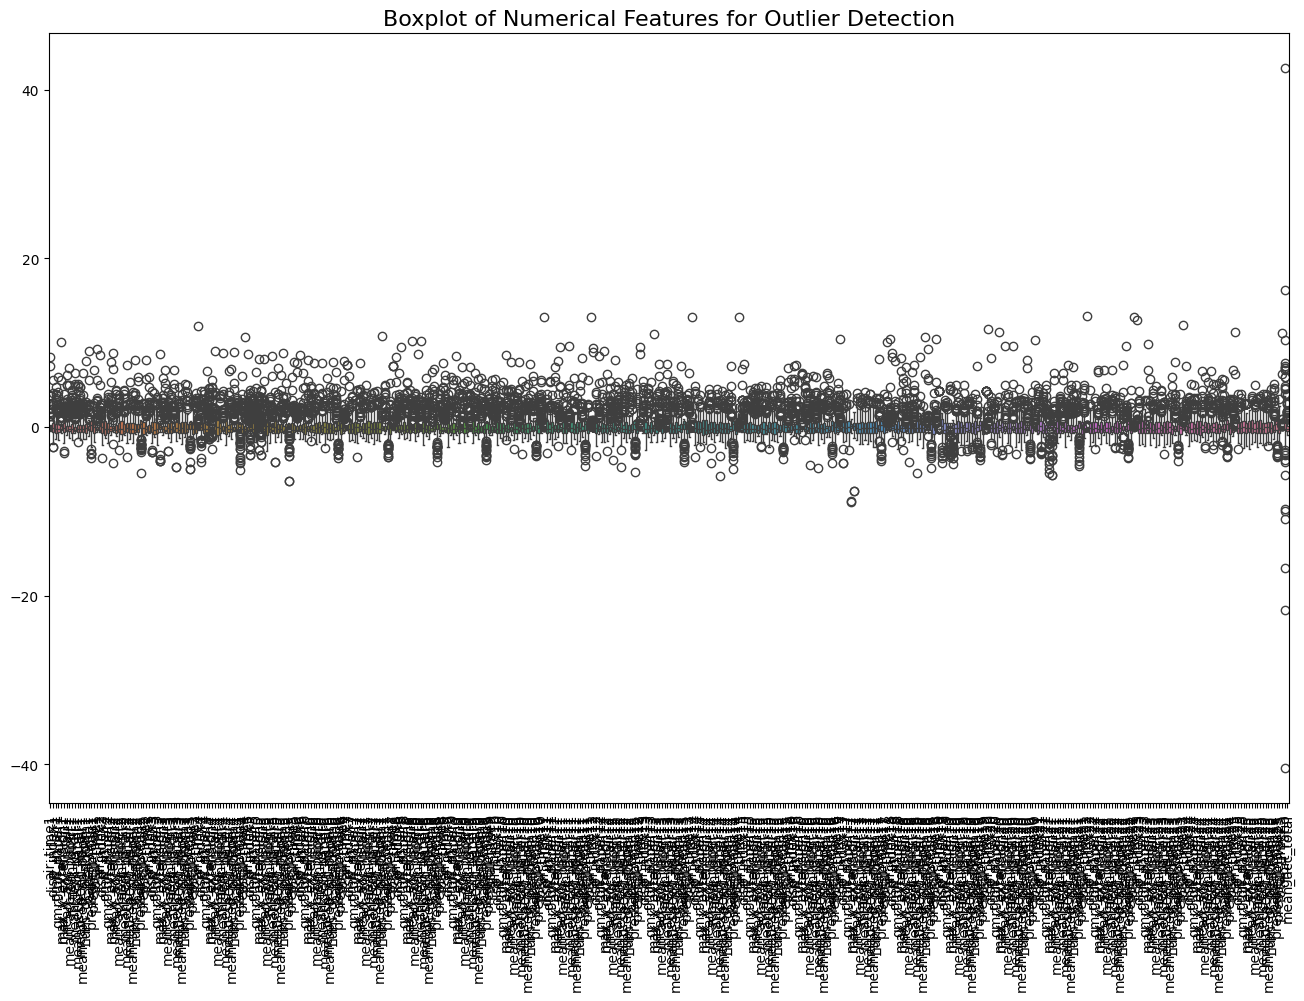

In [ ]:
# boxplot for outlier
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_parquet.select_dtypes(include=[float, int]))
plt.title('Boxplot of Numerical Features for Outlier Detection', fontsize=16)
plt.xticks(rotation=90)
plt.show()

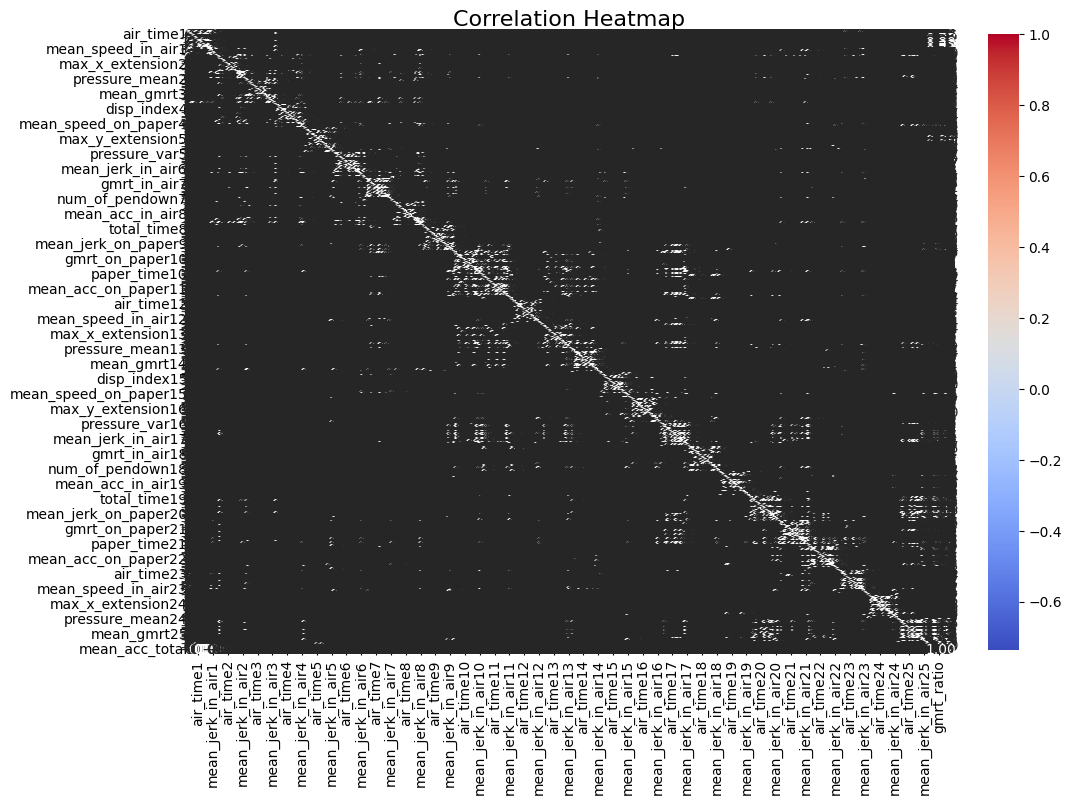

In [ ]:
numeric_df = df_parquet.select_dtypes(include=[float, int])

# Plot a heatmap to visualize correlations between numeric variables
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:

df_parquet = pd.read_parquet('data.parquet', engine='pyarrow')

# Drop non-numeric columns like 'ID'
df_numeric = df_parquet.drop(columns=['ID', 'class'])  # Assuming 'class' is also non-numeric

X = df_numeric.drop(columns=['pressure_mean1'])  # All columns except the target
y = df_numeric['pressure_mean1']  # Target column

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 5.219673593111357
R-squared: -3.118287853005943


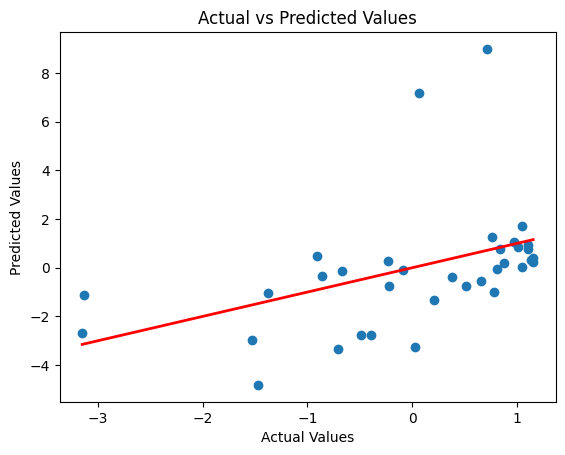

In [ ]:
# plot of actual vs training
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line showing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")

Ridge Regression Mean Squared Error: 4.890688964053526
Ridge Regression R-squared: -2.8587211621955078


In [ ]:
from sklearn.tree import DecisionTreeRegressor



In [ ]:
# Fit a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

feature_importances = tree_model.feature_importances_
features = X.columns

plt.figure(figsize=(30,20))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()